In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [30]:
shop = yf.Ticker("SHOP.TO")
shop_df = shop.history(period='max')
shop_df = shop_df.drop(columns=["Dividends", "Stock Splits"])
shop_df = shop_df.loc['2015':'2021']
shop_df["Return"] = shop_df['Close'].pct_change()
shop_df["Return ewm"] = shop_df["Return"].ewm(span=2, adjust=False).mean()
shop_df["Vol change"] = shop_df['Volume'].pct_change()
shop_df["Volume Diff"] = shop_df["Volume"].diff()
shop_df["Chaikin"] = shop_df["Volume Diff"].ewm(span=3, adjust=False).mean()
shop_df["Chaikin Change"] = shop_df["Chaikin"].pct_change()
shop_df["High/Close"] = (shop_df['High']/shop_df['Close']) - 1
shop_df["Low/Close"] = (shop_df['Low']/shop_df['Close']) - 1
shop_df["High Change"] = shop_df['High'].pct_change()
shop_df["Low Change"] = shop_df['Low'].pct_change()
shop_df["Pos"] = np.where(shop_df['Return'] > 0, '1', '0')
shop_df["Spread"] = shop_df['High'] - shop_df['Low']
shop_df["Spread Change"] = shop_df['Spread'].pct_change()
shop_df = shop_df.dropna()
shop_df.rename(columns = {"Close": "Shop Close"},  inplace = True)
shop_df

,Open,High,Low,Shop Close,Volume,Return,Return ewm,Vol change,Volume Diff,Chaikin,Chaikin Change,High/Close,Low/Close,High Change,Low Change,Pos,Spread,Spread Change
Date,,,,,,,,,,,,,,,,,,
2015-05-25,35.000000,37.470001,35.000000,37.259998,117800,0.066400,0.083626,-0.635068,-205000.0,-76250.000000,-2.452381,0.005636,-0.060655,-0.014725,0.093750,1,2.470001,-0.590381
2015-05-26,36.000000,37.689999,36.000000,36.919998,96800,-0.009125,0.021792,-0.178268,-21000.0,-48625.000000,-0.362295,0.020856,-0.024919,0.005871,0.028571,0,1.689999,-0.315790
2015-05-27,38.000000,38.160000,33.630001,34.500000,135700,-0.065547,-0.036434,0.401860,38900.0,-4862.500000,-0.900000,0.106087,-0.025217,0.012470,-0.065833,0,4.529999,1.680475
2015-05-28,34.599998,34.599998,33.139999,34.000000,38400,-0.014493,-0.021807,-0.717023,-97300.0,-51081.250000,9.505141,0.017647,-0.025294,-0.093291,-0.014570,0,1.459999,-0.677704
2015-05-29,33.709999,34.250000,33.349998,33.520000,22800,-0.014118,-0.016681,-0.406250,-15600.0,-33340.625000,-0.347302,0.021778,-0.005072,-0.010116,0.006337,0,0.900002,-0.383560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,1505.380005,1517.150024,1465.160034,1490.949951,99000,0.001525,-0.003306,-0.572169,-132400.0,-43025.768172,-1.928311,0.017573,-0.017298,-0.027605,-0.009646,1,51.989990,-0.356479
2021-01-18,1470.010010,1536.709961,1470.000000,1517.119995,67200,0.017553,0.010600,-0.321212,-31800.0,-37412.884086,-0.130454,0.012913,-0.031059,0.012893,0.003303,1,66.709961,0.283131
2021-01-19,1511.839966,1516.280029,1464.000000,1494.390015,159700,-0.014982,-0.006455,1.376488,92500.0,27543.557957,-1.736205,0.014648,-0.020336,-0.013295,-0.004082,0,52.280029,-0.216309


In [31]:
vix = yf.Ticker("^VIX")
vix_df = vix.history(period='max')
vix_df = pd.DataFrame(vix_df["Close"])
vix_df["Vix return"] = vix_df['Close'].pct_change()
vix_df["Vix ewm"] = vix_df["Vix return"].ewm(span=2, adjust=False).mean()
vix_df = vix_df.loc['2015':'2021']
vix_df = vix_df.dropna()
vix_df.rename(columns = {"Close": "Vix Close"},  inplace = True)
vix_df.head()

,Vix Close,Vix return,Vix ewm
Date,,,
2015-01-02,17.790001,-0.073437,0.001947
2015-01-05,19.920000,0.119730,0.080469
2015-01-06,21.120001,0.060241,0.066984
2015-01-07,19.309999,-0.085701,-0.034806
2015-01-08,17.010000,-0.119109,-0.091008


In [32]:
crm = yf.Ticker("CRM")
crm_df = crm.history(period='max')
crm_df = pd.DataFrame(crm_df["Close"])
crm_df = crm_df.loc['2015':'2021']
crm_df["Crm return"] = crm_df['Close'].pct_change()
crm_df = crm_df.dropna()
crm_df.rename(columns = {"Close": "CRM Close"},  inplace = True)
crm_df.head()

,CRM Close,Crm return
Date,,
2015-01-05,58.169998,-0.018062
2015-01-06,57.200001,-0.016675
2015-01-07,56.930000,-0.004720
2015-01-08,58.590000,0.029159
2015-01-09,58.160000,-0.007339


In [33]:
cad = yf.Ticker("CAD=X")
cad_df = cad.history(period='max')
cad_df = pd.DataFrame(cad_df["Close"])
cad_df = cad_df.loc['2010':'2021']
cad_df["Cad return"] = cad_df['Close'].pct_change()
cad_df = cad_df.dropna()
cad_df.rename(columns = {"Close": "CAD Close"},  inplace = True)
cad_df.head()

,CAD Close,Cad return
Date,,
2010-01-04,1.0410,-0.009703
2010-01-05,1.0395,-0.001441
2010-01-06,1.0319,-0.007311
2010-01-07,1.0340,0.002035
2010-01-08,1.0298,-0.004062


In [34]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2021']
tsx_df["Tsx return"] = tsx_df['Close'].pct_change()
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close,Tsx return
Date,,
2010-01-05,11888.099609,0.001786
2010-01-06,11944.500000,0.004744
2010-01-07,11887.500000,-0.004772
2010-01-08,11953.799805,0.005577
2010-01-11,11947.099609,-0.000561


In [35]:
shopmodel_df = pd.concat([shop_df, vix_df, crm_df, cad_df, tsx_df], axis=1, join="inner")
shopmodel_df["Pos"] = shopmodel_df["Pos"].shift(-1)
shopmodel_df = shopmodel_df.dropna()

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

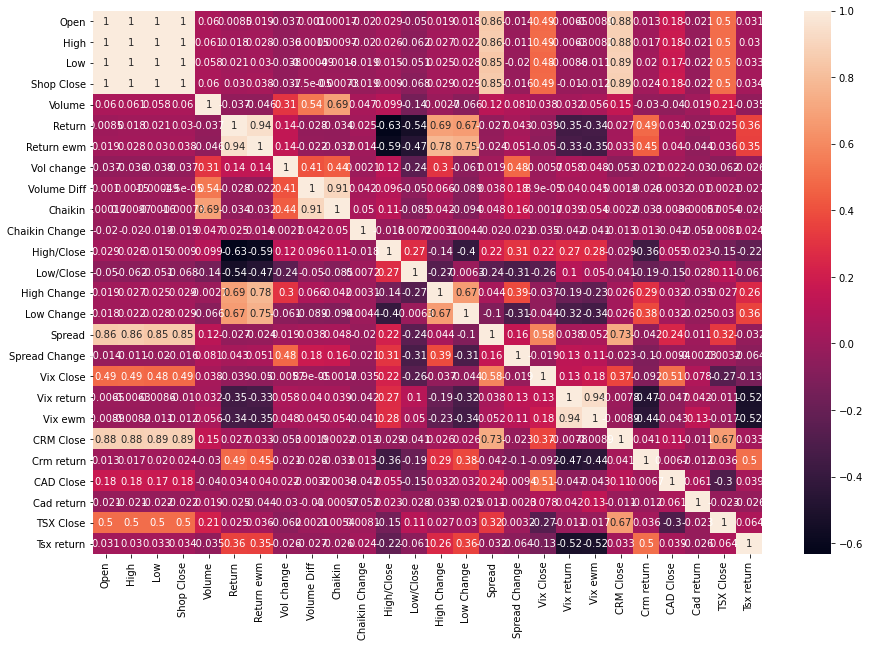

In [37]:
corrmat = shopmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [38]:
shop_df = shopmodel_df[["High Change", "Low Change", "Vix ewm", "High/Close", "Low/Close", "Vix Close", "CAD Close", "Spread", "Spread Change", "Volume Diff", "Vol change", "Return ewm",  "Vix return", "Crm return", "Tsx return", "Cad return", "Return", "Chaikin", "Chaikin Change", "Pos"]]
shop_df

,High Change,Low Change,Vix ewm,High/Close,Low/Close,Vix Close,CAD Close,Spread,Spread Change,Volume Diff,Vol change,Return ewm,Vix return,Crm return,Tsx return,Cad return,Return,Chaikin,Chaikin Change,Pos
Date,,,,,,,,,,,,,,,,,,,,
2015-05-26,0.005871,0.028571,0.102176,0.020856,-0.024919,14.060000,1.23193,1.689999,-0.315790,-21000.0,-0.178268,0.021792,0.159110,-0.019197,-0.008994,0.001976,-0.009125,-48625.000000,-0.362295,0
2015-05-27,0.012470,-0.065833,-0.003400,0.106087,-0.025217,13.270000,1.24244,4.529999,1.680475,38900.0,0.401860,-0.036434,-0.056188,0.005165,0.003967,0.008531,-0.065547,-4862.500000,-0.900000,0
2015-05-28,-0.093291,-0.014570,0.000876,0.017647,-0.025294,13.310000,1.24540,1.459999,-0.677704,-97300.0,-0.717023,-0.021807,0.003014,-0.017174,-0.000232,0.002382,-0.014493,-51081.250000,9.505141,0
2015-05-29,-0.010116,0.006337,0.026839,0.021778,-0.005072,13.840000,1.24251,0.900002,-0.383560,-15600.0,-0.406250,-0.016681,0.039820,0.000963,-0.006149,-0.002321,-0.014118,-33340.625000,-0.347302,1
2015-06-01,0.003796,0.002399,0.015208,0.004089,-0.023657,13.970000,1.24561,0.950001,0.055555,-11400.0,-0.500000,0.008760,0.009393,0.004811,0.003996,0.002495,0.021480,-22370.312500,-0.329037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,-0.008116,0.001041,-0.032076,0.001930,-0.021666,22.209999,1.27077,35.949951,-0.280857,-3400.0,-0.027222,0.006885,-0.048007,0.012342,-0.002841,-0.004988,0.007206,-17203.072687,-0.445172,0
2021-01-14,0.022090,-0.007460,0.020525,0.048056,-0.006214,23.250000,1.26981,80.789917,1.247289,109900.0,0.904527,-0.012968,0.046826,-0.011825,0.001305,-0.000755,-0.022894,46348.463656,-3.694197,1
2021-01-15,-0.027605,-0.009646,0.038096,0.017573,-0.017298,24.340000,1.26477,51.989990,-0.356479,-132400.0,-0.572169,-0.003306,0.046882,-0.011410,-0.002734,-0.003969,0.001525,-43025.768172,-1.928311,0


In [39]:
shop_csv_data = shop_df.to_csv('shop_posneg.csv', index = True) 

In [42]:
back_df = shopmodel_df[["Open", "Shop Close", "High Change", "Low Change", "Vix ewm", "High/Close", "Low/Close", "Vix Close", "CAD Close", "Spread", "Spread Change", "Volume Diff", "Vol change", "Return ewm",  "Vix return", "Crm return", "Tsx return", "Cad return", "Return", "Chaikin", "Chaikin Change", "Pos"]]
back_df

,Open,Shop Close,High Change,Low Change,Vix ewm,High/Close,Low/Close,Vix Close,CAD Close,Spread,...,Vol change,Return ewm,Vix return,Crm return,Tsx return,Cad return,Return,Chaikin,Chaikin Change,Pos
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-26,36.000000,36.919998,0.005871,0.028571,0.102176,0.020856,-0.024919,14.060000,1.23193,1.689999,...,-0.178268,0.021792,0.159110,-0.019197,-0.008994,0.001976,-0.009125,-48625.000000,-0.362295,0
2015-05-27,38.000000,34.500000,0.012470,-0.065833,-0.003400,0.106087,-0.025217,13.270000,1.24244,4.529999,...,0.401860,-0.036434,-0.056188,0.005165,0.003967,0.008531,-0.065547,-4862.500000,-0.900000,0
2015-05-28,34.599998,34.000000,-0.093291,-0.014570,0.000876,0.017647,-0.025294,13.310000,1.24540,1.459999,...,-0.717023,-0.021807,0.003014,-0.017174,-0.000232,0.002382,-0.014493,-51081.250000,9.505141,0
2015-05-29,33.709999,33.520000,-0.010116,0.006337,0.026839,0.021778,-0.005072,13.840000,1.24251,0.900002,...,-0.406250,-0.016681,0.039820,0.000963,-0.006149,-0.002321,-0.014118,-33340.625000,-0.347302,1
2015-06-01,33.619999,34.240002,0.003796,0.002399,0.015208,0.004089,-0.023657,13.970000,1.24561,0.950001,...,-0.500000,0.008760,0.009393,0.004811,0.003996,0.002495,0.021480,-22370.312500,-0.329037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,1520.089966,1523.560059,-0.008116,0.001041,-0.032076,0.001930,-0.021666,22.209999,1.27077,35.949951,...,-0.027222,0.006885,-0.048007,0.012342,-0.002841,-0.004988,0.007206,-17203.072687,-0.445172,0
2021-01-14,1560.209961,1488.680054,0.022090,-0.007460,0.020525,0.048056,-0.006214,23.250000,1.26981,80.789917,...,0.904527,-0.012968,0.046826,-0.011825,0.001305,-0.000755,-0.022894,46348.463656,-3.694197,1
2021-01-15,1505.380005,1490.949951,-0.027605,-0.009646,0.038096,0.017573,-0.017298,24.340000,1.26477,51.989990,...,-0.572169,-0.003306,0.046882,-0.011410,-0.002734,-0.003969,0.001525,-43025.768172,-1.928311,0


In [43]:
back_csv_data = back_df.to_csv('shop_open.csv', index = True) 